In [34]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

In [65]:
bird = pd.read_csv("bird.csv")

In [66]:
bird.head(3)

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.7,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.3,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.9,75.35,4.04,38.31,3.34,SW


In [67]:
bird = bird.drop("id", axis=1).dropna(axis=0, how="any").reset_index(drop=True)

In [68]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(bird['type']))}
print(class_mapping)
bird['type'] = bird['type'].map(class_mapping)

{'SW': 3, 'P': 0, 'R': 1, 'SO': 2, 'T': 4, 'W': 5}


In [69]:
bird.head(10)

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,3
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,3
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,3
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,3
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,3
5,61.92,4.78,50.46,3.47,49.52,4.41,56.95,2.73,29.07,2.83,3
6,79.73,5.94,67.39,4.50,42.07,3.41,71.26,3.56,37.22,3.64,3
7,86.98,5.68,74.52,4.55,44.46,3.78,76.02,3.81,37.94,3.81,3
8,118.20,7.82,116.64,6.13,59.33,5.45,110.00,5.58,61.62,4.37,3
9,145.00,10.42,144.00,7.05,70.96,7.44,120.00,7.31,78.67,6.34,3


In [63]:
bird.shape

(413,)

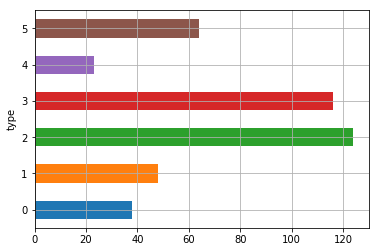

In [71]:
_ = bird.groupby("type").size().plot.barh(grid=True)

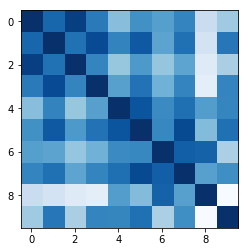

In [72]:
_ = plt.imshow(bird[bird.columns[:-1]].corr(), cmap="Blues")

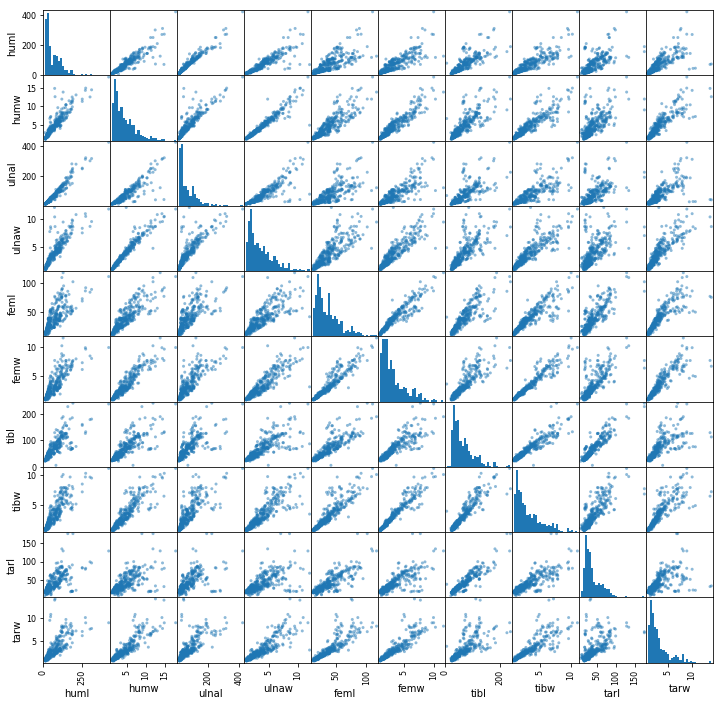

In [73]:
_ = pd.plotting.scatter_matrix(bird[bird.columns[:-1]], figsize=(12,12), grid=True, hist_kwds={"bins":30})

In [74]:
msk = np.random.rand(len(bird)) < 0.8
train = bird[msk]
test = bird[~msk]

In [82]:
train.describe()
train.shape

(322, 11)

In [80]:
test.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,59.922198,4.119011,64.076703,3.410220,35.015165,3.097912,60.894066,3.005165,37.656593,2.695495,2.505495
std,49.421461,2.565026,56.780904,2.054287,18.691776,1.958188,34.559788,2.002754,20.969277,1.967159,1.551871
min,9.850000,1.270000,14.730000,1.080000,12.770000,0.980000,20.890000,0.910000,7.770000,0.690000,0.000000
25%,24.765000,2.235000,28.080000,1.830000,21.260000,1.705000,36.075000,1.535000,22.445000,1.305000,1.500000
50%,41.360000,3.440000,38.720000,2.890000,28.490000,2.370000,48.650000,2.360000,30.630000,2.030000,2.000000
75%,75.230000,4.810000,74.315000,4.005000,41.945000,3.690000,71.185000,3.660000,47.810000,2.940000,3.000000
max,272.000000,14.860000,320.000000,10.420000,91.600000,9.710000,180.000000,10.230000,99.720000,8.910000,5.000000


In [84]:
train[:len(train.columns) - 2]

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,3
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,3
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,3
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,3
7,86.98,5.68,74.52,4.55,44.46,3.78,76.02,3.81,37.94,3.81,3
8,118.20,7.82,116.64,6.13,59.33,5.45,110.00,5.58,61.62,4.37,3
9,145.00,10.42,144.00,7.05,70.96,7.44,120.00,7.31,78.67,6.34,3
10,165.00,11.45,156.00,8.68,80.25,7.85,143.00,8.25,86.61,6.63,3
11,186.00,9.83,152.00,8.76,56.02,7.02,185.00,8.07,90.80,4.59,3


In [98]:
svm_model = SVC(kernel='linear')
_ = svm_model.fit(train.iloc[:,:len(train.columns) - 1], train['type'])

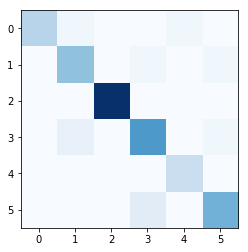

In [102]:
from sklearn import metrics
test_result = svm_model.predict(test.iloc[:, :len(train.columns) - 1])
metrics.accuracy_score(test_result, test['type'])
conf_matrix = metrics.confusion_matrix(test['type'], test_result)
_ = plt.imshow(conf_matrix, cmap="Blues")